<a href="https://colab.research.google.com/github/rofiat13/projects/blob/main/Smoker_Status_Prediction_using_Bio_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
smoker_status= pd.read_csv("https://s3.us-west-1.wasabisys.com/dphi/datasets/227/train_dataset.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=BvQUv4go2GqR8bq1s0yi6rOHSJ8%3D&Expires=1654423249")

In [5]:
smoker_status.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [6]:
smoker_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [7]:
smoker_status.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
y=smoker_status['smoking']
x=smoker_status.drop('smoking', axis=1)

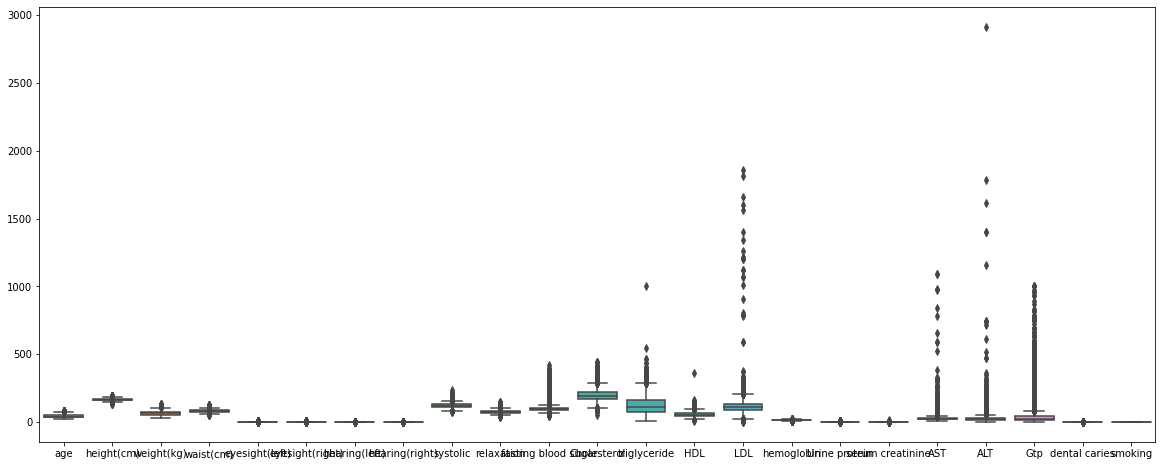

In [9]:
plt.figure(figsize = (20,8))
sns.boxplot(data=smoker_status)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [11]:
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)
print(x_train.shape)

(27288,)
(11696,)
(11696, 22)
(27288, 22)


In [12]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [13]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(x_train)

PCA()

In [14]:
pca.n_components_

22

In [15]:
pca.transform(x_train)
pca.transform(x_test)

array([[ 2.31478967,  1.2184321 ,  0.59938118, ..., -0.09539173,
         0.24873431,  0.24465705],
       [-2.67637405, -0.61667771,  1.07559462, ..., -0.02223653,
        -0.05614198,  0.3704771 ],
       [ 1.05100808, -3.39538934, -0.6942641 , ..., -0.1147342 ,
         0.0253749 , -0.10623318],
       ...,
       [-0.22788299, -2.42262153,  0.17738094, ..., -0.04517078,
         0.00383393, -0.16965234],
       [-1.17356992,  0.3133506 , -0.60067189, ...,  0.11671794,
        -0.00757538,  0.19436089],
       [ 1.56298421,  1.30993938,  0.13492374, ...,  0.2490524 ,
        -0.09586901,  0.58282561]])

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
clf=GridSearchCV(GradientBoostingClassifier(learning_rate=0.1),{
    'loss':['log_loss', 'deviance', 'exponential'],
    'max_depth':[3,4,5],
    'random_state':[1,2,3]
    })
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'random_state': [1, 2, 3]})

In [18]:
pred=clf.predict(x_test)
pred

array([1, 0, 0, ..., 1, 0, 0])

In [19]:
clf.score(x_test,y_test)

0.7611149110807114

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm= confusion_matrix(y_test, pred)

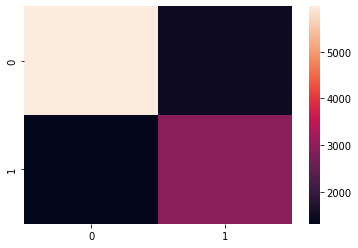

In [21]:
sns.heatmap(cm)

In [27]:
cr=classification_report(y_test,pred )
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7453
           1       0.66      0.69      0.68      4243

    accuracy                           0.76     11696
   macro avg       0.74      0.75      0.74     11696
weighted avg       0.76      0.76      0.76     11696



In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)

In [31]:
pred2=dtc.predict(x_test)

In [32]:
dtc.score(x_test,y_test)

0.7376025991792066

In [34]:
cr2=classification_report(y_test,pred2 )
print(cr2)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      7453
           1       0.64      0.65      0.64      4243

    accuracy                           0.74     11696
   macro avg       0.72      0.72      0.72     11696
weighted avg       0.74      0.74      0.74     11696

